In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)

In [20]:
def json_file2dataFrame(json_file, is_train=True):
    contents = None
    with open(json_file,'r') as f:
        contents = f.readlines()
    sentence1s = []
    sentence2s = []
    if is_train:
        labels = []
    for content in contents:
        content.replace(r'\n','')
        content_json = json.loads(content)
        sentence1s.append(content_json['sentence1'])
        sentence2s.append(content_json['sentence2'])
        if is_train:
            labels.append(content_json['label'])
    if is_train:
        df = pd.DataFrame({'sentence1':sentence1s,'sentence2':sentence2s,'label':labels})
    else:
        df = pd.DataFrame({'sentence1':sentence1s,'sentence2':sentence2s})
    return df

In [24]:
train_df = json_file2dataFrame('data/train.json')

In [25]:
dev_df = json_file2dataFrame('data/dev.json')

In [27]:
test_df = json_file2dataFrame('data/test.json', is_train=False)

In [28]:
train_df.to_csv('data/train.csv', index=False)
dev_df.to_csv('data/dev.csv', index=False)
test_df.to_csv('data/test.csv', index=False)

In [32]:
train_df['label'] = train_df['label'].astype(int)
dev_df['label'] = dev_df['label'].astype(int)

In [31]:
train_df['label'].value_counts()

0    23761
1    10573
Name: label, dtype: int64

In [33]:
dev_df['label'].value_counts()

0    2978
1    1338
Name: label, dtype: int64

Text(0.5, 1.0, 'similarity')

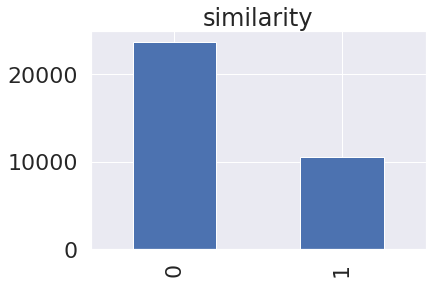

In [34]:
train_df['label'].value_counts().plot.bar()
plt.title('similarity')

Text(0.5, 1.0, 'similarity')

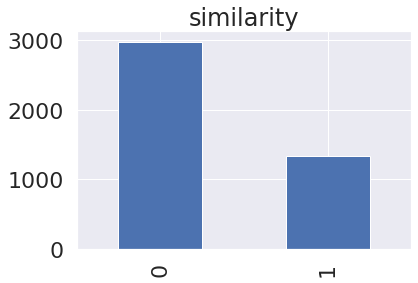

In [36]:
dev_df['label'].value_counts().plot.bar()
plt.title('similarity')

In [37]:
train_df['sentence1_len'] = train_df['sentence1'].astype(str).apply(len)
train_df['sentence2_len'] = train_df['sentence2'].astype(str).apply(len)

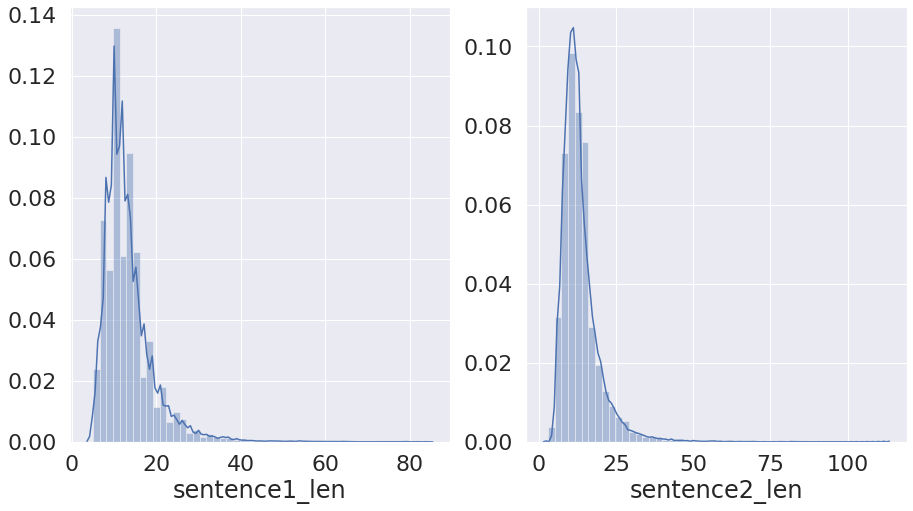

In [51]:
fig, axes = plt.subplots(1,2,figsize = (15, 8)) 
sns.distplot(train_df['sentence1_len'], ax = axes[0], kde = True)
sns.distplot(train_df['sentence2_len'], ax = axes[1], kde = True)
plt.show()

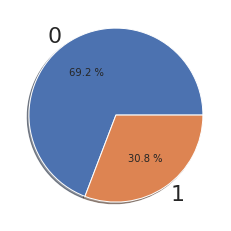

In [65]:
plt.pie(x=train_df['label'].value_counts().values,
        labels= train_df['label'].value_counts().index, 
        shadow=True,
        autopct='%3.1f %%')
#plt.legend(loc='upper right', ncol=1)
plt.show()